Exploring the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os
import sys
import importlib
import functions.functions as aux_fun
importlib.reload(aux_fun)
from datetime import datetime as dti

pd.options.mode.chained_assignment = None 

Reading data

In [2]:
# Read data

# Portifolio and profile datasets
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)

# User and offer data, already treated in Data Preparation 
user_offer_df = pd.read_csv('user_offer.csv').astype({'offer_id_rec':np.int8})

# Reading the hexideciamal to int dictonaries
map_portifolio = json.load(open('mapper_id/portifolio_ids.json'))
map_profile = json.load(open('mapper_id/profile_ids.json'))

Quick look at the data

In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
user_offer_df.head()

,offer_id_rec,viewed_rate,completed_rate,tra_offer_infl,valid_view_rate,completed_after_view_rate,reward_won,user_id
0,7,1.0,0.0,49.39,1.0,NaN,0.0,3
1,3,1.0,1.0,37.67,1.0,1.0,5.0,3
2,0,1.0,1.0,48.28,1.0,1.0,10.0,3
3,8,1.0,1.0,0.00,1.0,0.0,5.0,3
4,4,1.0,0.0,1.09,1.0,NaN,0.0,4


#### Data preparation for analysis

##### 1. Profile

Preparing the profile and portifolio datasets to analysis.  

It is necessary create a column for interger ids

In [6]:
# Profile
profile['user_id'] = profile.id.map(map_profile)

For the profile dataset, there are some users with a fixed age of 118.   
Observing the other data, it is noted that users who are not registrant such information such as genre, age and income.The only information it appears is when the user became a member.

In [7]:
# For profile, calculate the 

profile.loc[pd.isna(profile.gender)].head()

,gender,age,id,became_member_on,income,user_id
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,2
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,4
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN,6
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN,7


In [8]:
profile.loc[pd.isna(profile.gender)].shape[0] / profile.shape[0]

0.12794117647058822

12% of total users has no data for gender, age and income

To create one more feature for users, the time they are member, in relation to the latest user, since the date of collecting the data is not known.  

It is worth mentioning that even for users without information, this data is present at the dataset

In [9]:
# Convert to datetime
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
# Get the newest user in data
most_recent_mem_data = profile['became_member_on'].max()
# Creating a extra column to put number of days compared with newest
profile['rela_member_days'] = (most_recent_mem_data - profile['became_member_on']).dt.days
profile['rela_member_years'] = (most_recent_mem_data - profile['became_member_on']).dt.days / 365

profile.head()

,gender,age,id,became_member_on,income,user_id,rela_member_days,rela_member_years
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,529,1.449315
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,376,1.030137
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2,14,0.038356
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,3,443,1.213699
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,4,356,0.975342


For gender data, the voids are replaced by not informed.  
For application in models, this category could be treated separately later

In [10]:
# Replace NaN gender with NI (not informed)
profile['gender'] = profile['gender'].fillna('NI')

profile.head()

,gender,age,id,became_member_on,income,user_id,rela_member_days,rela_member_years
0,NI,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,529,1.449315
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,376,1.030137
2,NI,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2,14,0.038356
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,3,443,1.213699
4,NI,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,4,356,0.975342


For income, all the users are part of the group that did not also inform the age and gender.  

For this case, the distribution of income to check if the average may be a good choice 

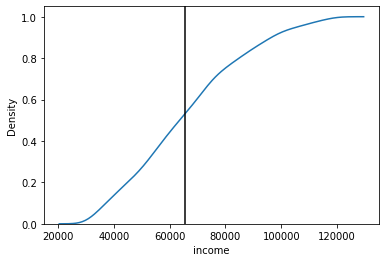

Mean income: 65404.9915682968
Median income: 64000.0


In [11]:
# Distribuition of income
sns.kdeplot(data=profile, x='income', cumulative=True)
plt.axvline(x=profile["income"].mean(), color='black')
plt.show()

print(f'Mean income: {profile["income"].mean()}')
print(f'Median income: {profile["income"].median()}')

65 thousand is the average and 64 thousand the median, which shows that 50% of the values are close to that value.  
Thus, assigning the median to the missing values will not change the distributions significantly.

In [12]:
# Fill na with mean

profile['income'] = profile['income'].fillna(profile.income.median())

profile.head()

,gender,age,id,became_member_on,income,user_id,rela_member_days,rela_member_years
0,NI,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,64000.0,0,529,1.449315
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,376,1.030137
2,NI,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,64000.0,2,14,0.038356
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,3,443,1.213699
4,NI,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,64000.0,4,356,0.975342


Por último, o valor de 118 no campo de idade pode atrapalhar nas análise. Assim, para esses valores, também se usará a mediana das idades como substituto.

In [13]:
# Fill 118 values with meadian, without this extreme value
profile.loc[profile.age == 118, 'age'] = profile.loc[profile.age != 118, 'age'].median()

profile.head()

,gender,age,id,became_member_on,income,user_id,rela_member_days,rela_member_years
0,NI,55.0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,64000.0,0,529,1.449315
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,376,1.030137
2,NI,55.0,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,64000.0,2,14,0.038356
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,3,443,1.213699
4,NI,55.0,a03223e636434f42ac4c3df47e8bac43,2017-08-04,64000.0,4,356,0.975342


##### 2. Portifolio

First, create the integer id column for portifolio

In [14]:
# Portifolio
portfolio['offer_id'] = portfolio.id.map(map_portifolio)

portfolio.head()

,reward,channels,difficulty,duration,offer_type,id,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,2
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,3
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,4


##### 3. Merging datasets

Merging the user offer dataset with profile and portifolio dataset  

The extra information will be used to exploring the data.

In [15]:
# Just interesting columns from profile and portifolio
# Profile
profile2 = profile[['user_id', 'gender', 'age', 'income', 'rela_member_years']]

# Portifolio
portfolio2 = portfolio[['offer_id', 'reward', 'difficulty', 'offer_type']]
portfolio2.columns = ['offer_id', 'offer_reward', 'offer_difficulty', 'offer_type']

# Merging with user_offer_id

user_offer_df2 =  user_offer_df.merge(portfolio2, left_on='offer_id_rec', right_on='offer_id')
user_offer_df2 = user_offer_df2.merge(profile2, on='user_id')

user_offer_df2.head() 



,offer_id_rec,viewed_rate,completed_rate,tra_offer_infl,valid_view_rate,completed_after_view_rate,reward_won,user_id,offer_id,offer_reward,offer_difficulty,offer_type,gender,age,income,rela_member_years
0,7,1.0,0.0,49.39,1.0,NaN,0.0,3,7,0,0,informational,F,75.0,100000.0,1.213699
1,3,1.0,1.0,37.67,1.0,1.0,5.0,3,3,5,5,bogo,F,75.0,100000.0,1.213699
2,0,1.0,1.0,48.28,1.0,1.0,10.0,3,0,10,10,bogo,F,75.0,100000.0,1.213699
3,8,1.0,1.0,0.00,1.0,0.0,5.0,3,8,5,5,bogo,F,75.0,100000.0,1.213699
4,7,0.0,0.0,0.00,NaN,NaN,0.0,4,7,0,0,informational,NI,55.0,64000.0,0.975342


Informações contínuas, como renda e idade podem ser melhor analisadas a partir do seu agrupamento.  
O melhor agrupamento para uma única variável é nos quartis, separando os dados em 4 partes iguais.

In [18]:
user_offer_df2['age_quartile'] = pd.qcut(user_offer_df2['age'], q=4)
user_offer_df2['age_decile'] = pd.qcut(user_offer_df2['age'], q=10)
user_offer_df2['income_quartile'] = pd.qcut(user_offer_df2['income'], q=4)
# user_offer_df2['member_days_quartile'] = pd.qcut(user_offer_df2['rela_member_days'], q=4)
user_offer_df2['member_years_quartile'] = pd.qcut(user_offer_df2['rela_member_years'], q=4)

user_offer_df2.head()

,offer_id_rec,viewed_rate,completed_rate,tra_offer_infl,valid_view_rate,completed_after_view_rate,reward_won,user_id,offer_id,offer_reward,offer_difficulty,offer_type,gender,age,income,rela_member_years,age_quartile,age_decile,income_quartile,member_years_quartile
0,7,1.0,0.0,49.39,1.0,NaN,0.0,3,7,0,0,informational,F,75.0,100000.0,1.213699,"(65.0, 101.0]","(67.0, 75.0]","(76000.0, 120000.0]","(0.981, 2.169]"
1,3,1.0,1.0,37.67,1.0,1.0,5.0,3,3,5,5,bogo,F,75.0,100000.0,1.213699,"(65.0, 101.0]","(67.0, 75.0]","(76000.0, 120000.0]","(0.981, 2.169]"
2,0,1.0,1.0,48.28,1.0,1.0,10.0,3,0,10,10,bogo,F,75.0,100000.0,1.213699,"(65.0, 101.0]","(67.0, 75.0]","(76000.0, 120000.0]","(0.981, 2.169]"
3,8,1.0,1.0,0.00,1.0,0.0,5.0,3,8,5,5,bogo,F,75.0,100000.0,1.213699,"(65.0, 101.0]","(67.0, 75.0]","(76000.0, 120000.0]","(0.981, 2.169]"
4,7,0.0,0.0,0.00,NaN,NaN,0.0,4,7,0,0,informational,NI,55.0,64000.0,0.975342,"(45.0, 55.0]","(54.0, 55.0]","(51000.0, 64000.0]","(0.57, 0.981]"


#### Modeling data

Preparing the data

In [16]:
from sklearn.linear_model import LinearRegression

In [25]:
user_offer_df2

model_df = pd.get_dummies(data=user_offer_df2, columns=['offer_id_rec', 'offer_type', 'gender', 'income_quartile', 'age_quartile'])

model_df.head()

,viewed_rate,completed_rate,tra_offer_infl,valid_view_rate,completed_after_view_rate,reward_won,user_id,offer_id,offer_reward,offer_difficulty,...,gender_NI,gender_O,"income_quartile_(29999.999, 51000.0]","income_quartile_(51000.0, 64000.0]","income_quartile_(64000.0, 76000.0]","income_quartile_(76000.0, 120000.0]","age_quartile_(17.999, 45.0]","age_quartile_(45.0, 55.0]","age_quartile_(55.0, 65.0]","age_quartile_(65.0, 101.0]"
0,1.0,0.0,49.39,1.0,NaN,0.0,3,7,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1.0,1.0,37.67,1.0,1.0,5.0,3,3,5,5,...,0,0,0,0,0,1,0,0,0,1
2,1.0,1.0,48.28,1.0,1.0,10.0,3,0,10,10,...,0,0,0,0,0,1,0,0,0,1
3,1.0,1.0,0.00,1.0,0.0,5.0,3,8,5,5,...,0,0,0,0,0,1,0,0,0,1
4,0.0,0.0,0.00,NaN,NaN,0.0,4,7,0,0,...,1,0,0,1,0,0,0,1,0,0


In [48]:
user_offer_df2

model_df = pd.get_dummies(data=user_offer_df2, columns=['offer_id_rec', 'offer_type', 'gender', 'income_quartile', 'age_quartile'])

model_df = model_df.loc[model_df.gender_NI==0]

y = model_df['tra_offer_infl']

X = model_df[['offer_id_rec_0', 'offer_id_rec_1', 'offer_id_rec_2', 'offer_id_rec_3',
       'offer_id_rec_4', 'offer_id_rec_5', 'offer_id_rec_6', 'offer_id_rec_7',
       'offer_id_rec_8', 'offer_id_rec_9', 'offer_type_bogo',
       'offer_type_discount', 'offer_type_informational', 'gender_F',
       'gender_M', 'gender_NI', 'gender_O',
       'income_quartile_(29999.999, 51000.0]',
       'income_quartile_(51000.0, 64000.0]',
       'income_quartile_(64000.0, 76000.0]',
       'income_quartile_(76000.0, 120000.0]', 'age_quartile_(17.999, 45.0]',
       'age_quartile_(45.0, 55.0]', 'age_quartile_(55.0, 65.0]',
       'age_quartile_(65.0, 101.0]']]


model = LinearRegression()

model.fit(X, y)

model.score(X, y)

def prever(n):
       x_ = X.iloc[:n]
       y_ = y.iloc[:n]
       model = LinearRegression()
       model.fit(X, y)
       return model.score(X, y)

rang =  np.arange(0,  len(model_df), 100)

res = []
for n in rang:
       res.append(prever(n))




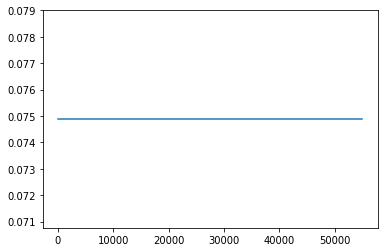

In [49]:
plt.plot(rang, res)

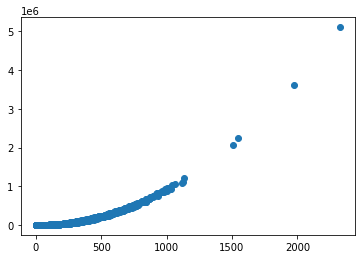

In [57]:
residuals = (model.predict(X) - y)**2 

plt.scatter(y,residuals)